# Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

## Loading Datasets

In [ ]:
train = pd.read_csv("train_FDF.csv")
test = pd.read_csv("test_FDF.csv")
ff = pd.read_csv("fulfilment_center_info.csv")
meal = pd.read_csv("meal_info.csv")

In [ ]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [ ]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [ ]:
ff

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


## Merging the datasets

In [ ]:
df_train = train.merge(ff, on = "center_id", how ="left").merge(meal, on="meal_id", how="left")
df_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [ ]:
df_test = test.merge(ff, on = "center_id", how ="left").merge(meal, on="meal_id", how="left")
df_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


# Exploratory Data Analysis

## Checking for null values

In [ ]:
df_train.isnull().sum(), df_test.isnull().sum()

(id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 num_orders               0
 city_code                0
 region_code              0
 center_type              0
 op_area                  0
 category                 0
 cuisine                  0
 dtype: int64, id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 city_code                0
 region_code              0
 center_type              0
 op_area                  0
 category                 0
 cuisine                  0
 dtype: int64)

## Getting dataset info

In [ ]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

(None, None)

## Preprocessing the data

In [ ]:
# create pivot table

data = df_train.pivot_table(index = ['id','center_id','meal_id','week'], values = ['num_orders'], aggfunc = "sum")
data.reset_index(inplace = True)
data

,id,center_id,meal_id,week,num_orders
0,1000000,157,2760,3,149
1,1000001,104,2956,100,161
2,1000002,75,1971,143,149
3,1000003,24,2539,41,540
4,1000004,83,2539,45,271
...,...,...,...,...,...
456543,1499994,161,1109,8,378
456544,1499995,93,2956,133,13
456545,1499997,174,2664,27,701
456546,1499998,36,2492,21,27


In [ ]:
# Grouping the dataset with "num_orders"

order = df_train.groupby('num_orders').sum().reset_index()
order

,num_orders,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
0,13,15498171128,924318,1056577,24509320,5249880.13,5397305.94,156,353,7444975,697820,46208.7
1,14,15349661518,908567,1045584,24274514,5201050.18,5344967.85,155,344,7369369,685576,45692.3
2,15,15377548007,913228,1050039,24337511,5212315.74,5361141.37,192,351,7395350,688852,45804.6
3,26,14324240293,851576,967439,22816188,4666670.03,4832768.23,230,447,6873479,646656,44173.9
4,27,14328482811,848091,977402,22879323,4699640.47,4861705.34,233,427,6893041,644675,43986.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,13150,1346216,132,43,1971,204.70,324.04,1,1,590,56,5.1
1246,13580,1470267,5,10,2290,162.99,309.43,1,0,590,56,6.3
1247,14229,1087163,6,43,2290,156.20,310.43,0,1,590,56,5.1
1248,15336,1300512,7,43,2290,159.08,311.43,1,1,590,56,5.1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


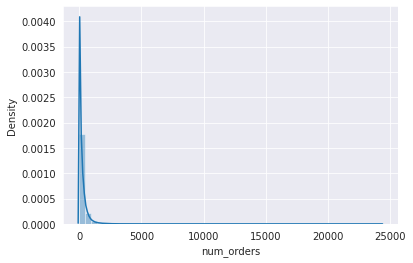

In [ ]:
# Plotting the "num_orders"

sns.distplot(df_train["num_orders"])

In [ ]:
# Number of orders in every week

week = df_train.groupby('week')["num_orders"].sum().reset_index()
week

,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


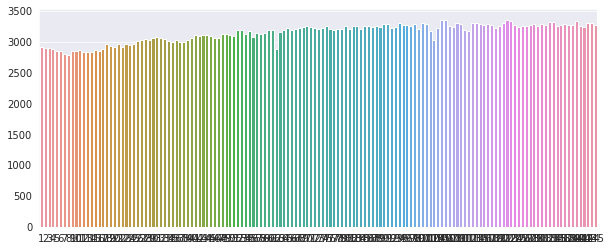

In [ ]:
week1 = df_train.week.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=week1.index, y=week1.values)
plt.show()

In [ ]:
# Checking for emails with "num_orders"

email = df_train.groupby("emailer_for_promotion")['num_orders'].sum().reset_index()
email

,emailer_for_promotion,num_orders
0,0,96175321
1,1,23382164


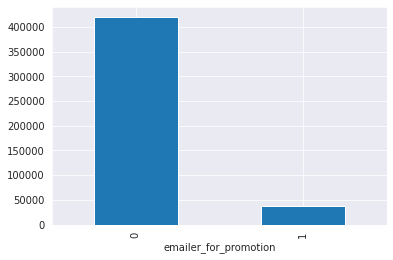

In [ ]:
df_train.groupby("emailer_for_promotion").num_orders.count().plot.bar(ylim = 0)
plt.show()

In [ ]:
# Checking for "homepage_featured" with "num_orders"

homepage = df_train.groupby("homepage_featured")['num_orders'].sum().reset_index()
homepage

,homepage_featured,num_orders
0,0,89899504
1,1,29657981


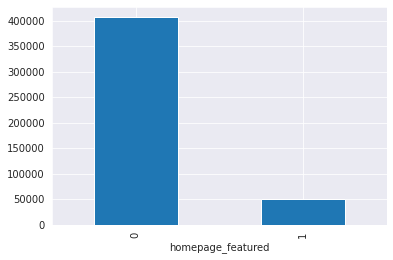

In [ ]:
df_train.groupby("homepage_featured").num_orders.count().plot.bar(ylim = 0)
plt.show()

In [ ]:
city = df_train.groupby("city_code")['num_orders'].sum().reset_index()
city

,city_code,num_orders
0,456,1937221
1,461,1158164
2,473,1214982
3,478,637527
4,485,1451046
5,515,894009
6,517,3205569
7,522,3375905
8,526,9207953
9,541,768013


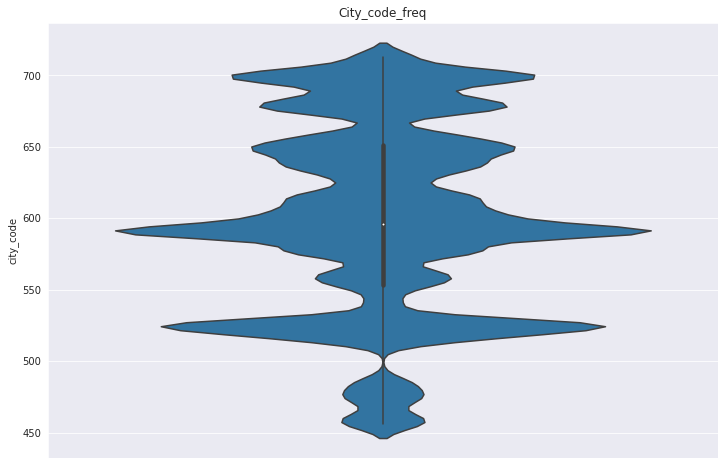

In [ ]:
plt.figure(figsize = (12,8))
plt.title("City_code_freq")
sns.axes_style("dark")
sns.violinplot(y=df_train["city_code"])
plt.show()

In [ ]:
#

region = df_train.groupby('region_code')["num_orders"].sum().reset_index()
region

,region_code,num_orders
0,23,1609906
1,34,24051733
2,35,691044
3,56,60520191
4,71,2103282
5,77,20529653
6,85,8685386
7,93,1366290


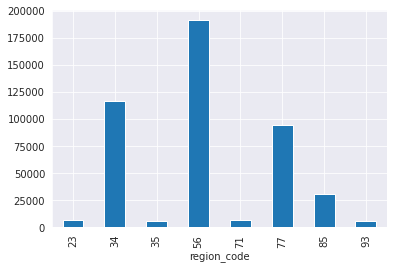

In [ ]:
df_train.groupby("region_code").num_orders.count().plot.bar(ylim = 0)
plt.show()

In [ ]:
center = df_train.groupby("center_type")['num_orders'].sum().reset_index()
center

,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


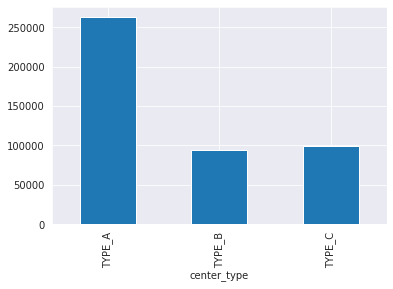

In [ ]:
df_train.groupby("center_type").num_orders.count().plot.bar(ylim = 0)
plt.show()

## Label Encoder

In [ ]:
le = preprocessing.LabelEncoder()

df_train.center_type = le.fit_transform(df_train.center_type)
df_test.center_type = le.fit_transform(df_test.center_type)

In [ ]:
center1 = df_train.groupby("center_type")['num_orders'].sum().reset_index()
center1

,center_type,num_orders
0,0,68978517
1,1,29996073
2,2,20582895


In [ ]:
area = df_train.groupby("op_area")['num_orders'].sum().reset_index()
area

,op_area,num_orders
0,0.9,425160
1,1.9,497338
2,2.0,1521501
3,2.4,637527
4,2.7,3058120
5,2.8,4656558
6,2.9,898613
7,3.0,2062748
8,3.2,1218319
9,3.4,3478065


In [ ]:
df_train.op_area = le.fit_transform(df_train.op_area)
df_test.op_area = le.fit_transform(df_test.op_area)

In [ ]:
area1 = df_train.groupby("op_area")['num_orders'].sum().reset_index()
area1

,op_area,num_orders
0,0,425160
1,1,497338
2,2,1521501
3,3,637527
4,4,3058120
5,5,4656558
6,6,898613
7,7,2062748
8,8,1218319
9,9,3478065


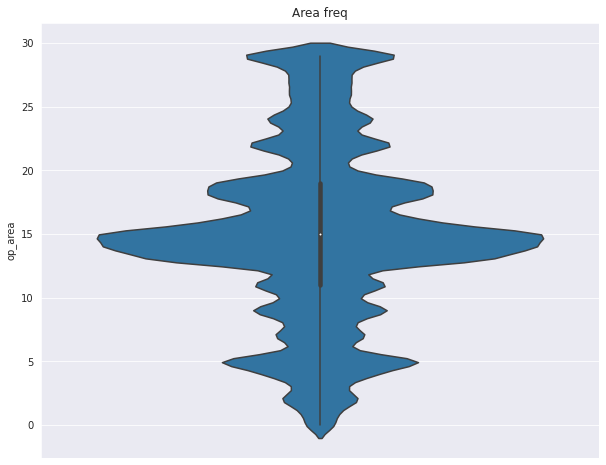

In [ ]:
plt.figure(figsize = (10,8))
plt.title("Area freq")
sns.axes_style("dark")
sns.violinplot(y=df_train["op_area"])
plt.show()

In [ ]:
category = df_train.groupby("category")['num_orders'].sum().reset_index()
category

,category,num_orders
0,Beverages,40480525
1,Biryani,631848
2,Desert,1940754
3,Extras,3984979
4,Fish,871959
5,Other Snacks,4766293
6,Pasta,1637744
7,Pizza,7383720
8,Rice Bowl,20874063
9,Salad,10944336


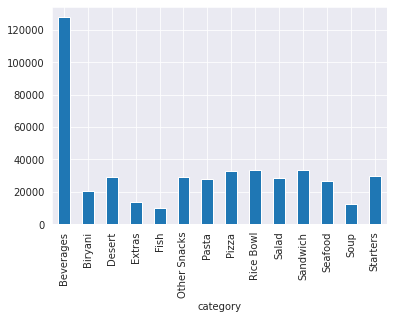

In [ ]:
df_train.groupby("category").num_orders.count().plot.bar(ylim = 0)
plt.show()

In [ ]:
df_train.category = le.fit_transform(df_train.category)
df_test.category= le.fit_transform(df_test.category)

In [ ]:
category1 = df_train.groupby("category")['num_orders'].sum().reset_index()
category1

,category,num_orders
0,0,40480525
1,1,631848
2,2,1940754
3,3,3984979
4,4,871959
5,5,4766293
6,6,1637744
7,7,7383720
8,8,20874063
9,9,10944336


In [ ]:
cuisine = df_train.groupby("cuisine")['num_orders'].sum().reset_index()
cuisine

,cuisine,num_orders
0,Continental,16914439
1,Indian,25792544
2,Italian,44172832
3,Thai,32677670


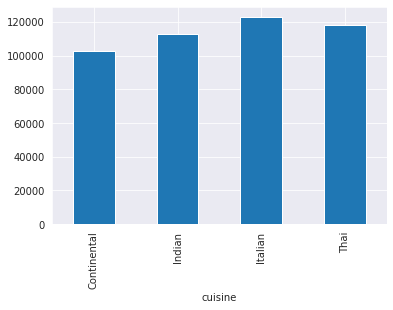

In [ ]:
df_train.groupby("cuisine").num_orders.count().plot.bar(ylim = 0)
plt.show()

In [ ]:
df_train.cuisine = le.fit_transform(df_train.cuisine)
df_test.cuisine= le.fit_transform(df_test.cuisine)

In [ ]:
cuisine1 = df_train.groupby("cuisine")['num_orders'].sum().reset_index()
cuisine1

,cuisine,num_orders
0,0,16914439
1,1,25792544
2,2,44172832
3,3,32677670


In [ ]:
df_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2,0,3
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2,2,0,3
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2,2,0,3
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2,2,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,0,19,2,1
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,0,19,2,1
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,0,19,9,2
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,0,19,9,2


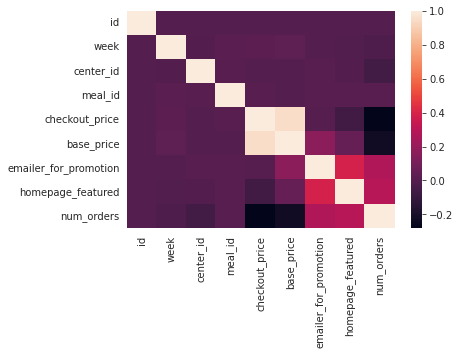

In [ ]:
# Create a heatmap to correlate survival

plt.figure(figsize = (6,4))
cmap = train.corr()
sns.heatmap(cmap)

## Get Dummies

In [ ]:
df_train.drop(['num_orders', 'id', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'city_code'],axis=1, inplace = True)
df_test.drop(['id', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'city_code'],axis=1, inplace = True)

In [ ]:
y = train['num_orders']
X = pd.get_dummies(df_train)
X_test = pd.get_dummies(df_test)

In [ ]:
X

,week,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,category,cuisine
0,1,0,0,56,2,2,0,3
1,1,0,0,56,2,2,0,3
2,1,0,0,56,2,2,0,3
3,1,0,0,56,2,2,0,1
4,1,0,0,56,2,2,0,1
...,...,...,...,...,...,...,...,...
456543,145,0,0,77,0,19,2,1
456544,145,0,0,77,0,19,2,1
456545,145,0,0,77,0,19,9,2
456546,145,0,0,77,0,19,9,2


In [ ]:
X_test

,week,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,category,cuisine
0,146,0,0,56,2,2,0,3
1,146,0,0,56,2,2,0,3
2,146,0,0,56,2,2,0,3
3,146,0,0,56,2,2,0,1
4,146,0,0,56,2,2,0,1
...,...,...,...,...,...,...,...,...
32568,155,0,0,77,0,19,2,1
32569,155,0,0,77,0,19,2,1
32570,155,0,0,77,0,19,9,2
32571,155,0,0,77,0,19,9,2


# Splitting dataset for training and testing

In [ ]:
# split train set for testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((410893, 8), (45655, 8), (410893,), (45655,))

# Model Selection

## Gradient Boosting

In [ ]:
# libraries

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.experimental import enable_hist_gradient_boosting #noqa
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
model = HistGradientBoostingRegressor().fit(X_train, Y_train)
model.score(X_train, Y_train)

0.7243281342613141

In [ ]:
mse = mean_squared_error(Y_test, model.predict(X_test))
print(mse)

47729.91059362734


In [ ]:
y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0
y_pred

array([100.02658767, 290.81343764,  46.64134962, ..., 181.57843814,
        36.52277592, 186.45037424])

In [ ]:
#accuracy

accuracy = round(model.score(X_test, Y_test) * 100, 2)
accuracy

71.81

#  Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(Y_test, y_pred)) * 100

72.79534927554441

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
230730,42,100.026588
394065,364,290.813438
149461,94,46.641350
1551,82,33.552931
79572,94,141.853428
...,...,...
319294,310,229.199799
71949,215,306.281147
75625,68,181.578438
411675,80,36.522776


In [ ]:
test_pred = model.predict(X_test)
test_pred[test_pred < 0] = 0
test_pred

array([100.02658767, 290.81343764,  46.64134962, ..., 181.57843814,
        36.52277592, 186.45037424])

In [ ]:
test_pred = pd.DataFrame(test_pred,columns =['num_orders'])

In [ ]:
test_pred.head

<bound method NDFrame.head of        num_orders
0      100.026588
1      290.813438
2       46.641350
3       33.552931
4      141.853428
...           ...
45650  229.199799
45651  306.281147
45652  181.578438
45653   36.522776
45654  186.450374

[45655 rows x 1 columns]>

In [ ]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45655 entries, 0 to 45654
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num_orders  45655 non-null  float64
dtypes: float64(1)
memory usage: 356.8 KB


# Save Output

In [ ]:
submission=pd.read_csv("sample_submission_hSlSoT6.csv") # Upload your file in colab notebook

In [ ]:
submission.head()

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [ ]:
submission['num_orders']=test_pred #Match the test pred with submission
submission['id']=submission['id'] # Match the id with submission

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32573 non-null  int64  
 1   num_orders  32573 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 509.1 KB


In [ ]:
submission.head()

,id,num_orders
0,1028232,100.026588
1,1127204,290.813438
2,1212707,46.641350
3,1082698,33.552931
4,1400926,141.853428


In [ ]:
#output = pd.DataFrame({'id': test.id, "num_orders": test_pred})
submission.to_csv("submission1.csv", index = True) # download the ourput in the colab 